In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print('Last date {}'.format(last_date))

# Calculate the date one year from the last date in data set.
year_prior = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print('Year prior {}'.format(year_prior))

# Perform a query to retrieve the data and precipitation scores
precipscores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>year_prior).\
order_by(Measurement.date).all()
precipscores[0:10]

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipscores_df = pd.DataFrame(precipscores)
precipscores_df = precipscores_df.set_index('date')
precipscores_df = pd.DataFrame(precipscores).set_index('date')
precipscores_df=precipscores_df.rename(columns={'prcp':'precipitation'})

# Sort the dataframe by date and drop NULLS/NAs
precipscores_df=precipscores_df.sort_values(by='date').dropna()
precipscores_df = precipscores_df.sort_index()
precipscores_df.head()

Last date ('2017-08-23',)
Year prior 2016-08-23


,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


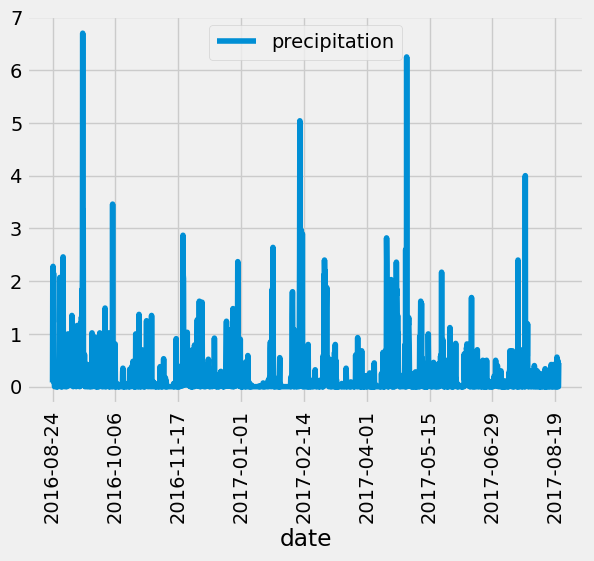

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
precipscores_df.plot(rot=90)
plt.savefig("Precipitation Analysis.png")
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipscores_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).count()
station_count

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stationnumber_ex = 'USC00519281'
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == stationnumber_ex).all()

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

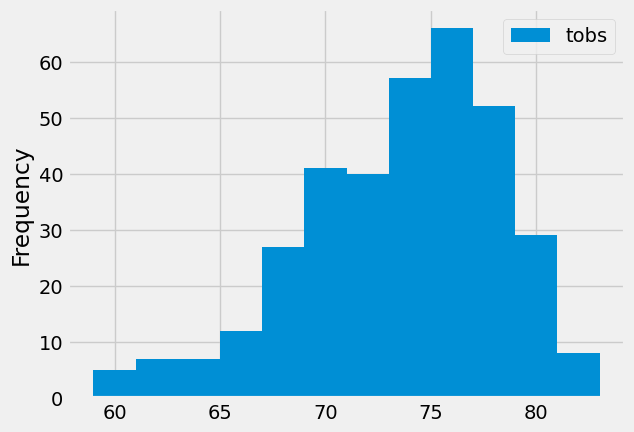

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_highest_obs = station_activity[0][0]

results = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-24").\
                        filter(Measurement.date <= "2017-08-23").\
                        filter(Measurement.station == station_highest_obs).all()

# convert to dataframe
results_df = pd.DataFrame(results)

# historgram 
#plt.savefig("Temperature Analysis over a Year")
results_df.plot.hist(bins=12)

# Close Session

In [17]:
# Close Session
session.close()